In [26]:
import pandas as pd
import numpy as np
import datetime
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.dates as dates

In [66]:
bond03 = pd.read_csv('03 Maturity.csv')
bond310 = pd.read_csv('310 Maturity.csv')

bond03.sort_values('MATURITY DATE')
bond310.sort_values('MATURITY DATE')

bonds = pd.concat([bond03, bond310])

In [67]:
isin_bonds = ['CA135087G328', 'CA135087H490', 'CA135087J546',
              'CA135087J967', 'CA135087K528', 'CA135087K940', 'CA135087L518', 'CA135087L930',
              'CA135087M847', 'CA135087M847', 'CA135087L286', 'CA135087M359']
selected_bonds = bonds[bonds['ISIN'].isin(isin_bonds)]
selected_bonds


,ISIN,COUPON,ISSUE DATE,MATURITY DATE,CLOSE PRICE - 10,CLOSE PRICE - 11,CLOSE PRICE - 12,CLOSE PRICE - 13,CLOSE PRICE - 14,CLOSE PRICE - 17,CLOSE PRICE - 18,CLOSE PRICE - 19,CLOSE PRICE - 20,CLOSE PRICE - 21
2,CA135087G328,0.50%,10/11/2016,3/1/2022,100.04,100.03,100.03,100.03,100.02,100.02,100.00,100.00,100.00,100.01
3,CA135087H490,1.75%,10/6/2017,3/1/2023,100.94,100.93,100.91,100.88,100.86,100.76,100.71,100.71,100.71,100.75
4,CA135087J546,2.25%,10/5/2018,3/1/2024,101.82,101.80,101.77,102.24,102.18,101.99,101.91,101.90,101.88,101.97
5,CA135087J967,1.50%,4/5/2019,9/1/2024,100.56,100.63,100.18,100.66,100.52,100.29,100.21,100.15,100.17,100.27
8,CA135087L286,0.25%,5/4/2020,8/1/2022,99.80,99.79,99.78,99.70,99.76,99.68,99.70,99.70,99.72,99.74
13,CA135087M359,0.25%,5/14/2021,8/1/2023,98.81,98.8,98.78,98.69,98.73,98.61,98.55,98.55,98.56,98.61
5,CA135087K528,1.25%,10/11/2019,3/1/2025,99.64,99.67,99.61,100.39,100.39,99.25,99.12,99.11,99.10,99.26
6,CA135087K940,0.50%,4/3/2020,9/1/2025,96.81,96.72,96.77,96.77,96.68,96.43,96.26,96.15,96.19,96.31
8,CA135087L518,0.25%,10/9/2020,3/1/2026,95.11,95.17,95.12,95.14,95.04,94.75,94.53,94.50,94.52,94.70
9,CA135087L930,1.00%,4/16/2021,9/1/2026,97.66,97.7,97.67,97.54,97.64,97.24,97.02,96.96,97.00,97.23


In [29]:
# The selected bonds information

bond_3_1_2022 = {'ISIN': 'CA135087G328', 'Coupon': 0.50, 'Maturity': datetime.date(
    2022, 3, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1),
    'Closing Price': [100.04, 100.03, 100.03, 100.03, 100.02, 100.02, 100.0, 100.0, 100.0, 100.01]}
bond_8_1_2022 = {'ISIN': 'CA135087L286', 'Coupon': 0.25, 'Maturity': datetime.date(
    2022, 8, 1), 'Last Coupon': datetime.date(2021, 8, 1), 'Next Coupon': datetime.date(2022, 2, 1),
    'Closing Price': [99.8, 99.79, 99.78, 99.7, 99.76, 99.68, 99.7, 99.7, 99.72, 99.74]}
bond_3_1_2023 = {'ISIN': 'CA135087H490', 'Coupon': 1.75, 'Maturity': datetime.date(
    2023, 3, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1), 
    'Closing Price': [100.94, 100.93, 100.91, 100.88, 100.86, 100.76, 100.71, 100.71, 100.71, 100.75]}       
bond_8_1_2023 = {'ISIN': 'CA135087M359', 'Coupon': 0.25, 'Maturity': datetime.date(
    2023, 8, 1), 'Last Coupon': datetime.date(2021, 8, 1), 'Next Coupon': datetime.date(2022, 2, 1),
    'Closing Price': [98.81, 98.8, 98.78, 98.69, 98.73, 98.61, 98.55, 98.55, 98.56, 98.61]}
bond_3_1_2024 = {'ISIN': 'CA135087J546', 'Coupon': 2.25, 'Maturity': datetime.date(
    2024, 3, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1),
    'Closing Price': [101.82, 101.80, 101.77, 102.24, 102.18, 101.99, 101.91, 101.9, 101.88, 101.97]}
bond_9_1_2024 = {'ISIN': 'CA135087J967', 'Coupon': 1.50, 'Maturity': datetime.date(
    2024, 9, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1),
    'Closing Price': [100.56, 100.63, 100.18, 100.66, 100.52, 100.29, 100.21, 100.15, 100.17, 100.27]}
bond_3_1_2025 = {'ISIN': 'CA135087K528', 'Coupon': 1.25, 'Maturity': datetime.date(
    2025, 3, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1),
    'Closing Price': [99.64, 99.67, 99.61, 100.39, 100.39, 99.25, 99.12, 99.11, 99.1, 99.26]}
bond_9_1_2025 = {'ISIN': 'CA135087K940', 'Coupon': 0.50, 'Maturity': datetime.date(
    2025, 9, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1),
    'Closing Price': [96.81, 96.72, 96.77, 96.77, 96.68, 96.43, 96.26, 96.15, 96.19, 96.31]}
bond_3_1_2026 = {'ISIN': 'CA135087L518', 'Coupon': 0.25, 'Maturity': datetime.date(
    2026, 3, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1),
    'Closing Price': [95.11, 95.17, 95.12, 95.14, 95.04, 94.75, 94.53, 94.5, 94.52, 94.7]}
bond_9_1_2026 = {'ISIN': 'CA135087L930', 'Coupon': 1.00, 'Maturity': datetime.date(
    2026, 9, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1),
    'Closing Price': [97.66, 97.7, 97.67, 97.54, 97.64, 97.24, 97.02, 96.96, 97.0, 97.23]}
bond_3_1_2027 = {'ISIN': 'CA135087M847', 'Coupon': 1.25, 'Maturity': datetime.date(
    2027, 3, 1), 'Last Coupon': datetime.date(2021, 9, 1), 'Next Coupon': datetime.date(2022, 3, 1),
    'Closing Price': [98.41, 98.48, 98.40, 98.44, 98.31, 97.96, 97.70, 97.66, 97.69, 97.94]}

bond_list = [bond_3_1_2022, bond_8_1_2022, bond_3_1_2023, bond_8_1_2023,
             bond_3_1_2024, bond_9_1_2024, bond_3_1_2025, bond_9_1_2025,
             bond_3_1_2026, bond_9_1_2026, bond_3_1_2027]


Question 4A


In [30]:
def get_diff_days(date1, date2):
    """ Return the number of days between two dates. 

    Params:
    date1: first date in datetime format
    date2: second date in datetime format (greater than first date)
    """
    diff = date2 - date1
    return diff.days

def get_accrued_interest(num_days_last_coupon, coupon_rate):
    """ Return the accrued interest. 
    Note that Canada government bonds use the actual/365 day-count convention.
    Formula: AI = (number of days since last coupon / 365) * coupon_rate

    Params: 
    num_days_last_coupon: the number of days since the last coupon payment
    coupon_rate: annual coupon rate
    """
    return (num_days_last_coupon / 365) * coupon_rate
    # return (coupon_rate / 2) * (num_days_last_coupon / 183)


def get_dirty_price(accrued_interest, clean_price):
    """ Return the dirty price (or present value of bond) using the accrued interest + clean price formula.
    Formula: DP = accrued interest + clean price

    Params: 
    accured_interest: the accrued interest on a bond
    clean_price: the price listed on the market (info we gathered)
    """
    return accrued_interest + clean_price

def get_present_value(coupon_rate, YTM, current_date, maturity_date, next_coupon_date):
    """ Return the present value (or dirty price of a bond) using the compounding formula with YTM.
    Formula: PV = sum{(coupon_rate / 2) * exp(-YTM * t_i)}

    Params:
    coupon_rate: the annual coupon rate (coupon payment)
    YTM: the yield to maturity
    current_date: the current date
    maturity_date: the maturity date of the bond
    next_coupon_date: the next coupon date of the bond
    """
    pv = 0
    t_i = get_diff_days(current_date, next_coupon_date) / 365
    total_periods = round(get_diff_days(
        next_coupon_date, maturity_date) / 365 * 2) # total periods starting from next coupon date till maturity

    for _ in range(0, total_periods):
        pv += (coupon_rate / 2) * np.exp(-YTM * t_i)
        t_i += 0.5 # next period (half a year)
    pv += (100 + coupon_rate / 2) * np.exp(-YTM * t_i)
    return pv


In [31]:
current_dates = {0: datetime.date(2022, 1, 10), 
                 1: datetime.date(2022, 1, 11), 
                 2: datetime.date(2022, 1, 12), 
                 3: datetime.date(2022, 1, 13), 
                 4: datetime.date(2022, 1, 14), 
                 5: datetime.date(2022, 1, 17), 
                 6: datetime.date(2022, 1, 18), 
                 7: datetime.date(2022, 1, 19), 
                 8: datetime.date(2022, 1, 20), 
                 9: datetime.date(2022, 1, 21)}


def find_ytm(YTM, current_date_idx, bond):
    """ Calculates the present value and dirty price and set them equal to each other 
    in order to solve for YTM. 
    This function will be used to find YTM through the use of Newton's Method. 

    Params:
    YTM: the yield to maturity 
    current_date_idx: the current date index (0-9)
    bond: the dictionary with bond information
    """
    coupon_rate = bond['Coupon']
    maturity_date = bond['Maturity']
    closing_price = bond['Closing Price'][current_date_idx]
    last_coupon_date = bond['Last Coupon']
    next_coupon_date = bond['Next Coupon']

    current_date = current_dates[current_date_idx]
    num_days_last_coupon = get_diff_days(last_coupon_date, current_date)
    pv = get_present_value(
        coupon_rate, YTM, current_dates[current_date_idx], maturity_date, next_coupon_date)
    ai = get_accrued_interest(num_days_last_coupon, coupon_rate)
    dp = get_dirty_price(ai, closing_price)

    return pv - dp


In [32]:
def get_ytm_list(bond_list):
    """ Use Newton's Method here to find YTM for each bond. 

    Params:
    bond_list: the list of all bonds
    """
    ytm_lst = np.zeros((10, len(bond_list)))
    for day in range(10):
        for bond_idx, bond in enumerate(bond_list):
            ytm = optimize.newton(find_ytm, bond['Coupon'] / 100, args=(day, bond))
            ytm_lst[day, bond_idx] = ytm
    return ytm_lst


In [33]:
# Get all the YTMs for each of the 10 days 
ytm_lst = get_ytm_list(bond_list)

In [34]:
# Need to interpolate and estimate the YTM for 9/1/2022 and 9/1/2023

# For 9/1/2022:
ytms_3_1_2022_to_3_1_2023 = ytm_lst[:, 0:3] 
dates_3_1_2022_to_3_1_2023 = dates.date2num([datetime.date(
    2022, 3, 1), datetime.date(2022, 8, 1), datetime.date(2023, 3, 1)]) 

for day in range(10):
    spl = make_interp_spline(dates_3_1_2022_to_3_1_2023,
                             ytms_3_1_2022_to_3_1_2023[day, :], k=2)

    # replace the ytm of 6/1/2022 with 9/1/2022
    ytm_lst[day, 1] = spl(dates.date2num(datetime.date(2022, 9, 1)))

# For 9/1/2023:
ytms_3_1_2023_to_3_1_2024 = ytm_lst[:, 2:5]
dates_3_1_2023_to_3_1_2024 = dates.date2num([datetime.date(
    2023, 3, 1), datetime.date(2023, 8, 1), datetime.date(2024, 3, 1)])

for day in range(10):
    spl = make_interp_spline(dates_3_1_2023_to_3_1_2024,
                             ytms_3_1_2023_to_3_1_2024[day, :], k=2)

    # replace the ytm of 6/1/2023 with 9/1/2023
    ytm_lst[day, 3] = spl(dates.date2num(datetime.date(2023, 9, 1)))

maturity_dates = ['3/1/2022', '9/1/2022', '3/1/2023', '9/1/2023', '3/1/2024',
                  '9/1/2024', '3/1/2025', '9/1/2025', '3/1/2026', '9/1/2026', '3/1/2027']


Text(0.5, 1.0, 'YTM Curve')

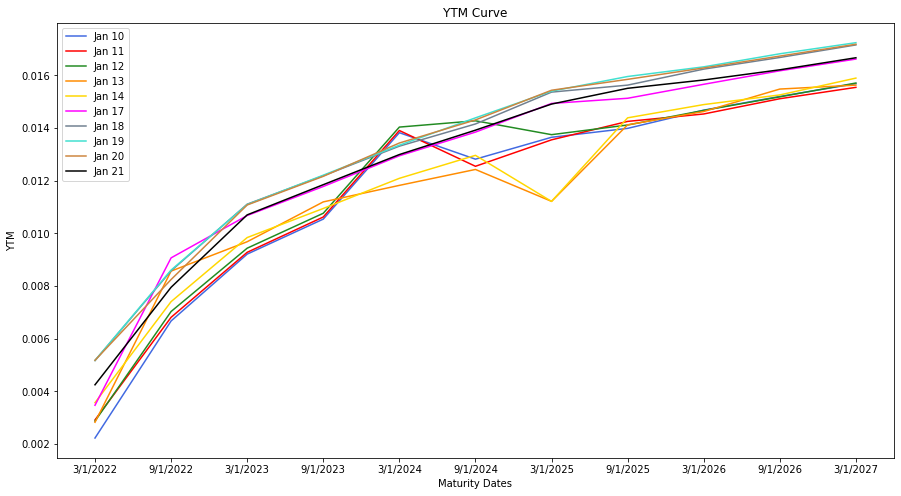

In [35]:
# 5-year YTM Curve

colours = ['royalblue', 'red', 'forestgreen', 'darkorange', 'gold', 'fuchsia', 'slategray', 'turquoise', 'peru', 'black']
plt.figure(figsize=(15, 8))
for day in range(10):
    plt.plot(maturity_dates, ytm_lst[day, :], colours[day])
plt.legend(['Jan 10', 'Jan 11','Jan 12','Jan 13','Jan 14','Jan 17','Jan 18','Jan 19','Jan 20','Jan 21'])
plt.xlabel('Maturity Dates')
plt.ylabel('YTM')
plt.title('YTM Curve')

Question 4B



In [36]:
def get_spot_rates_daily(bond_list, current_date_idx):
    """ Return the spot rates for the current 
    Formula: 
    1) For the first bond i.e. i = 0, we use the formula r_1 = -log(DP / (100 + coupon_rate / 2)) / t_1 
    2) For the rest, we use bootstrapping i.e. DP = PV = sum((coupon_rate / 2) * exp(-r_i * t_i)) + (100 + coupon_rate / 2) * exp(-r_N * t_N)
    We want to solve for r_N and notice that if we rearrange the variables, we get that:
    r_N = -log((DP - X) / (100 + coupon_rate / 2)) / t_N where X is the summation X = sum((coupon_rate / 2) * exp(-r_i * t_i))

    Params: 
    bond_list: the list of bonds
    current_date_idx: the current date index (0-9)
    """
    spot_lst = []
    current_date = current_dates[current_date_idx]

    for i, bond in enumerate(bond_list):
        coupon_rate = bond['Coupon']
        maturity_date = bond['Maturity']
        cp = bond['Closing Price'][current_date_idx]
        last_coupon_date = bond['Last Coupon']

        num_days_since_last_coupon = get_diff_days(last_coupon_date, current_date)
        ai = get_accrued_interest(num_days_since_last_coupon, coupon_rate)
        dp = get_dirty_price(ai, cp)
        
        time_to_maturity = get_diff_days(current_date, maturity_date) / 365
        if i == 0: # first bond with maturity less than 6 months
            spot_rate = -np.log(dp / (100 + coupon_rate / 2)) / time_to_maturity
            spot_lst.append(spot_rate)
        else: # bootstrap
            pv = 0
            for j in range(i): # the summation X
                maturity_date_j = bond_list[j]['Maturity']
                t_j = get_diff_days(current_date, maturity_date_j) / 365 
                pv += (coupon_rate / 2) * np.exp(-spot_lst[j] * t_j)
            spot_rate = -np.log((dp - pv) / (100 + coupon_rate / 2)) / time_to_maturity 
            spot_lst.append(spot_rate) 
    return np.array(spot_lst)


In [37]:
def get_all_spot_rates(bond_list): 
    """ Return all the spot rates for the 10 days.

    Params: 
    bond_list: the list of bonds
    """
    all_spot_rates = []
    for day in range(10):
        all_spot_rates.append(get_spot_rates_daily(bond_list, day))
    return np.array(all_spot_rates)

# Get all the spot rates for each of the 10 days
all_spot_rates = get_all_spot_rates(bond_list)


Text(0.5, 1.0, 'Spot Curve')

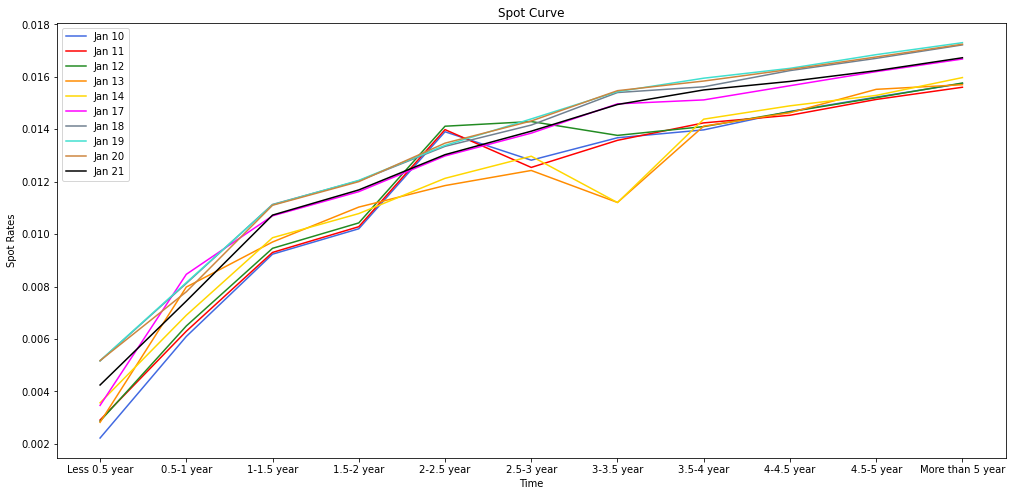

In [38]:
# 1 to 5 year spot curve

colours = ['royalblue', 'red', 'forestgreen', 'darkorange',
           'gold', 'fuchsia', 'slategray', 'turquoise', 'peru', 'black']
time = ['Less 0.5 year', '0.5-1 year', '1-1.5 year', '1.5-2 year',
        '2-2.5 year', '2.5-3 year', '3-3.5 year', '3.5-4 year', '4-4.5 year', '4.5-5 year', 'More than 5 year']
plt.figure(figsize=(17, 8))
for i in range(len(all_spot_rates)):
    plt.plot(time, all_spot_rates[i], colours[i])
plt.legend(['Jan 10', 'Jan 11', 'Jan 12', 'Jan 13', 'Jan 14',
            'Jan 17', 'Jan 18', 'Jan 19', 'Jan 20', 'Jan 21'])
plt.xlabel('Time')
plt.ylabel('Spot Rates')
plt.title('Spot Curve')


Question 4C



In [39]:
def get_forward_rates_daily(spot_rates, current_date_idx):
    """ Return the forward rates for each of the bonds on a given day.
    Formula:
    f_1j = [(r_j * t_j) - (r_1 * 1)] / (j - 1) for j > 1 and r_j is the spot rate
    1yr-1yr = f12
    1yr-2yr = f13
    1yr-3yr = f14
    1yr-4yr = f15

    Params:
    spot_rates: the list of spot rates found in 4B
    current_date_idx: the current date index (0-9)
    """
    forward_rates = []
    year_1_spot_rate = spot_rates[current_date_idx][2]
    for j in range(4, 11, 2):
        year = j / 2 
        forward_rate = ((spot_rates[current_date_idx][j] * year) - (year_1_spot_rate * 1)) / (year - 1)
        forward_rates.append(forward_rate)
    return forward_rates

def get_all_forward_rates(spot_rates):
    """ Return all the forward rates of all bonds for each day.

    Params: 
    spot_rates: the list of spot rates found in 4B
    """
    all_forward_rates = []
    for i in range(10):
        daily_forward_rates = get_forward_rates_daily(spot_rates, i)
        all_forward_rates.append(daily_forward_rates)
    return np.array(all_forward_rates)

In [40]:
# Get all the forward rates for each of the 10 days
all_forward_rates = get_all_forward_rates(all_spot_rates)


Text(0.5, 1.0, 'Forward Curve')

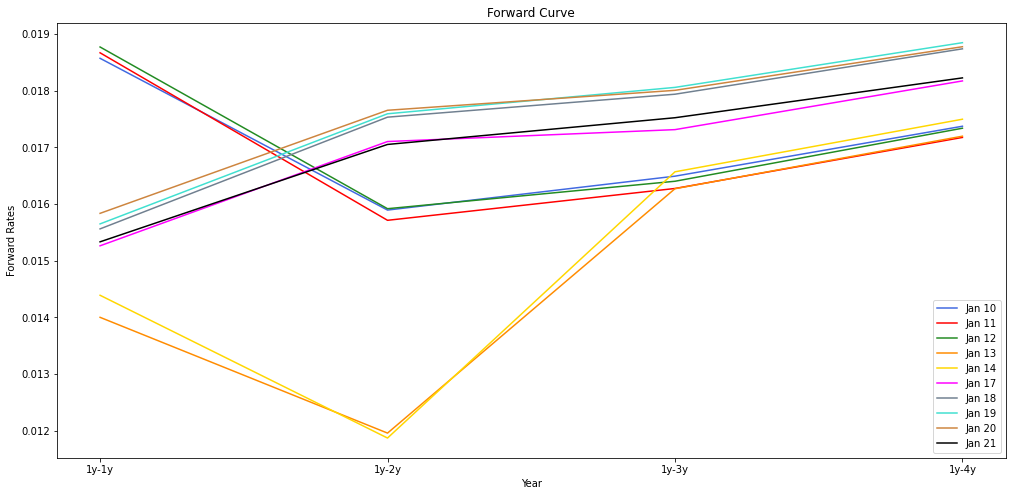

In [41]:
# 1yr-1yr to 1yr-4yr forward curve

all_forward_rates = get_all_forward_rates(all_spot_rates)
year = ['1y-1y', '1y-2y', '1y-3y', '1y-4y']
plt.figure(figsize=(17, 8))
for day in range(10):
    plt.plot(year, all_forward_rates[day], colours[day])
plt.legend(['Jan 10', 'Jan 11', 'Jan 12', 'Jan 13', 'Jan 14',
            'Jan 17', 'Jan 18', 'Jan 19', 'Jan 20', 'Jan 21'])
plt.xlabel('Year')
plt.ylabel('Forward Rates')
plt.title('Forward Curve')
    


Question 5


In [42]:
def build_yield_X(ytm_lst):
    """ Return the time series matrix X for yield (YTM).

    Params: 
    ytm_lst: the list of YTM for all bonds
    """
    X = np.zeros((5, 9))
    for i in range(5):
        for j in range(9):
            X[i][j] = np.log(ytm_lst[i][j+1] / ytm_lst[i][j])
    return X

def build_forward_X(forward_rates):
    """ Return the time series matrix X for forward rates.

    Params:
    forward_rates: the list of forward rates for all bonds
    """
    X = np.zeros((4, 9))
    for i in range(4):
        for j in range(9):
            X[i][j] = np.log(forward_rates[j+1][i] / forward_rates[j][i])
    return X


In [43]:
ytm_1_to_5 = np.array(
    [ytm_lst[:, 2], ytm_lst[:, 4], ytm_lst[:, 6], ytm_lst[:, 8], ytm_lst[:, 10]])

X_ytm = build_yield_X(ytm_1_to_5)

X_forward = build_forward_X(all_forward_rates)

# Get the covariance of each time series matrix 
cov_ytm = np.cov(X_ytm)
cov_forward = np.cov(X_forward)

In [44]:
# Covariance Matrix for the time series of daily log-returns of yield
cov_ytm


array([[0.00102371, 0.00062537, 0.00239803, 0.00069649, 0.00064685],
       [0.00062537, 0.00453391, 0.00715257, 0.0008561 , 0.00083026],
       [0.00239803, 0.00715257, 0.01562303, 0.00206671, 0.00191908],
       [0.00069649, 0.0008561 , 0.00206671, 0.00057259, 0.00053596],
       [0.00064685, 0.00083026, 0.00191908, 0.00053596, 0.0005048 ]])

In [45]:
# Covariance Matrix for the time series of daily log-returns of forward rates
cov_forward

array([[0.01095559, 0.01352372, 0.00103388, 0.00095433],
       [0.01352372, 0.02706001, 0.00247601, 0.0022119 ],
       [0.00103388, 0.00247601, 0.00052495, 0.00048608],
       [0.00095433, 0.0022119 , 0.00048608, 0.00045422]])

Question 6

In [46]:
eig_ytm = np.linalg.eig(cov_ytm)
eigenvalue_ytm =  eig_ytm[0]
eigenvector_ytm = eig_ytm[1]

eig_forward = np.linalg.eig(cov_forward)
eigenvalue_forward = eig_forward[0]
eigenvector_forward = eig_forward[1]

In [47]:
# Eigenvalues for covariance matrix of yield
eigenvalue_ytm

array([1.99761546e-02, 1.58729980e-03, 6.59272495e-04, 3.44038244e-05,
       9.14430794e-07])

In [48]:
# Eigenvectors for covariance matrix of yield
eigenvector_ytm


array([[-0.13361589, -0.60550743, -0.32004214,  0.71472014, -0.04749411],
       [-0.42559325,  0.66279424, -0.5732317 ,  0.22285765, -0.03625001],
       [-0.87968559, -0.15118398,  0.44056696, -0.09399252,  0.01904777],
       [-0.12038077, -0.30943527, -0.42912065, -0.52061763, -0.65922002],
       [-0.11260063, -0.27469576, -0.4367318 , -0.39954009,  0.74933063]])

In [49]:
# Eigenvalues for covariance matrix of forward rates
eigenvalue_forward


array([3.51229510e-02, 3.33159606e-03, 5.38519677e-04, 1.70076345e-06])

In [62]:
# Eigenvectors for covariance matrix of forward rates
eigenvector_forward


array([[-0.49028184, -0.86788727, -0.07959702, -0.00772722],
       [-0.8652965 ,  0.47373956,  0.1635872 ,  0.00848669],
       [-0.07755647,  0.11480503, -0.70671135, -0.69380391],
       [-0.06979019,  0.09572   , -0.68371237,  0.7200725 ]])